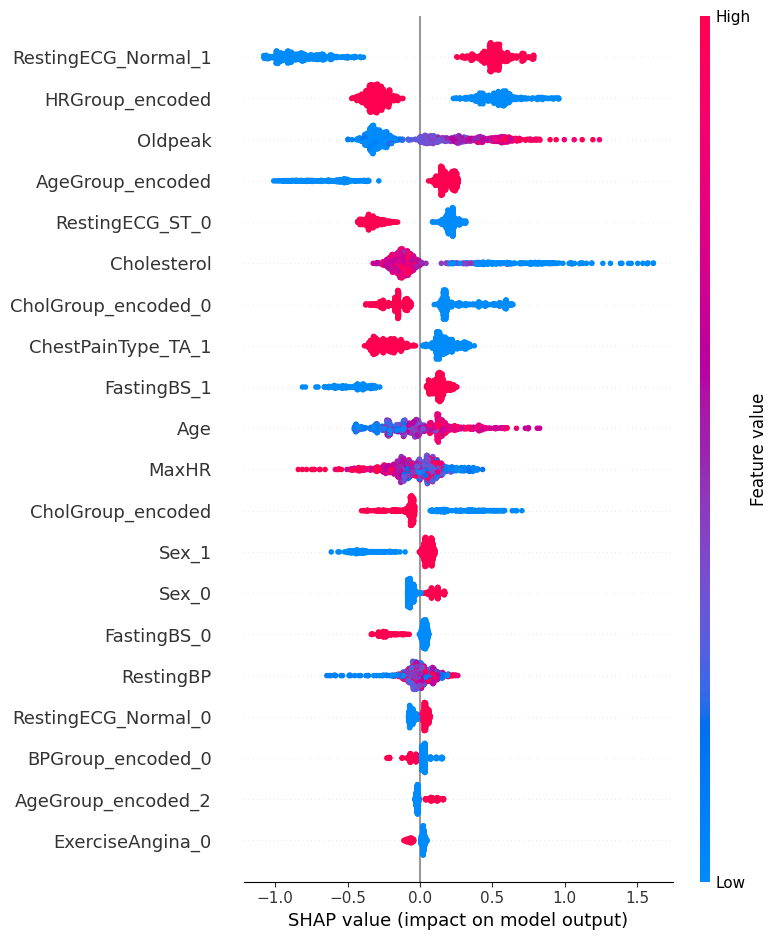

In [11]:
import pandas as pd
import shap
import joblib
import matplotlib.pyplot as plt
import sys
import os

sys.path.append(os.path.abspath("../src"))
from preprocessing import preprocess_data

# Load the original data + model
df = pd.read_csv("../data/heart.csv")

df = preprocess_data(df)

X = df.drop("HeartDisease", axis=1)
model = joblib.load("../model/model.pkl")

# Explain predictions using SHAP
explainer = shap.Explainer(model.named_steps["model"])
X_transformed = model.named_steps["preprocessor"].transform(X)

# SHAP values
shap_values = explainer(X_transformed)

# Get readable encoded feature names
ohe = model.named_steps["preprocessor"].named_transformers_["cat"].named_steps["encoder"]
original_cat_cols = model.named_steps["preprocessor"].transformers_[1][2]  # column names used for encoding
cat_feature_names = ohe.get_feature_names_out(original_cat_cols)

# Combine numeric + encoded feature names
numeric = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak", 
           "AgeGroup_encoded", "BPGroup_encoded", "CholGroup_encoded", 
           "OldpeakGroup_encoded", "HRGroup_encoded"]
all_feature_names = numeric + list(cat_feature_names)

# Now plot using the correct feature names
shap.summary_plot(shap_values, features=X_transformed, feature_names=all_feature_names, show=True)

